<h1>Importar librerias</h1>

In [1]:
from sklearn.tree import plot_tree
import numpy as np  
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder   #Transformar en un array las varibles object
from sklearn.model_selection import train_test_split  #dividir el data_set en data_train y data_test 
from sklearn.tree import DecisionTreeClassifier   #generar arboles de decision
from sklearn.linear_model import LogisticRegression   #generar la regresion logistica
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.metrics import f1_score #metrica de evaluacion
from sklearn.model_selection import RandomizedSearchCV  #probar con distintas caracteristicas y ver la mejor
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier ## random Forest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

<h1> Abrir datos y analizar datos </h1>

In [2]:
#Guardamos en una variable el df 
df=pd.read_csv('Medicaldataset.csv')
pd.set_option('display.max_columns', None)
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [4]:
df.isna().any()

Age                         False
Gender                      False
Heart rate                  False
Systolic blood pressure     False
Diastolic blood pressure    False
Blood sugar                 False
CK-MB                       False
Troponin                    False
Result                      False
dtype: bool

In [5]:
print('numero de caracteristicas:', len(df.columns))
print('numero de datos:', len(df))

numero de caracteristicas: 9
numero de datos: 1319


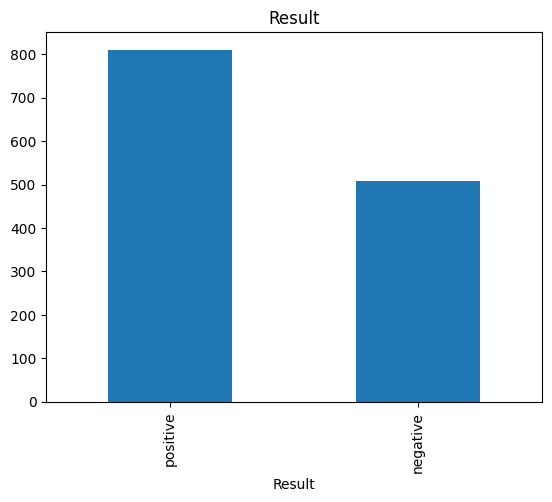

In [6]:
#Revisamos si hay una diferencia de clase en la variable Result
df['Result'].value_counts().plot(kind="bar")
plt.title("Result")
plt.show()

In [7]:
#información datos numericos (en caso de ser necesario se deben normalizar o estandarizar los datos, dependiendo del algoritmo a usar y la diferencia que exista entre ellos)
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


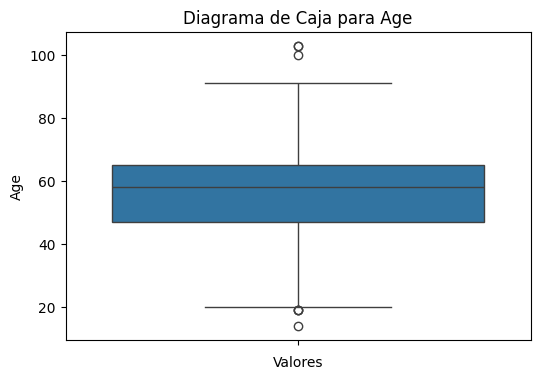

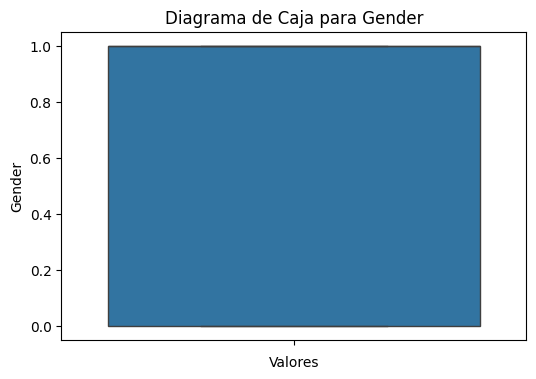

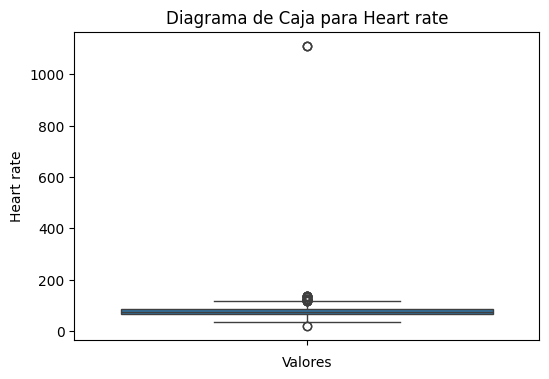

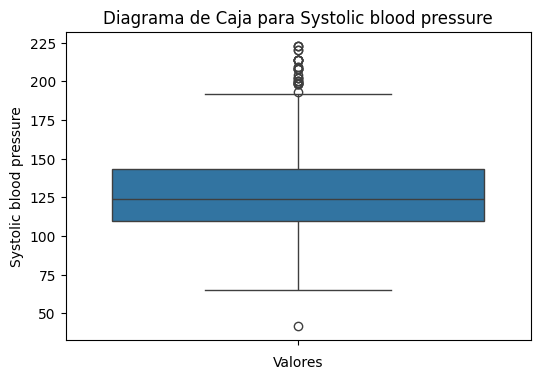

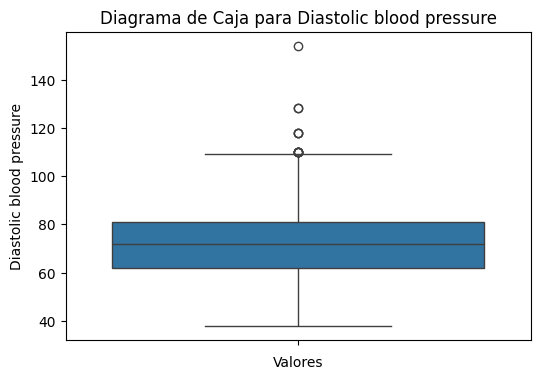

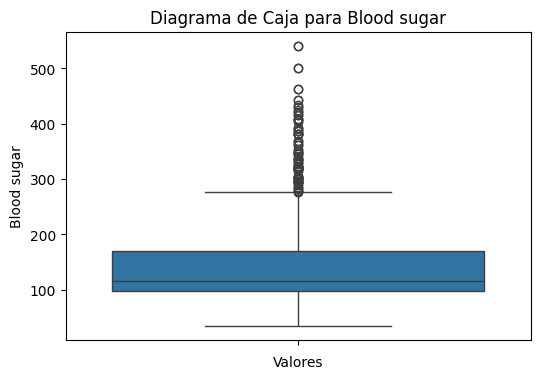

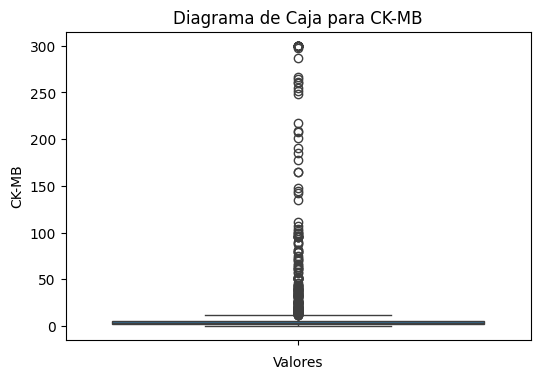

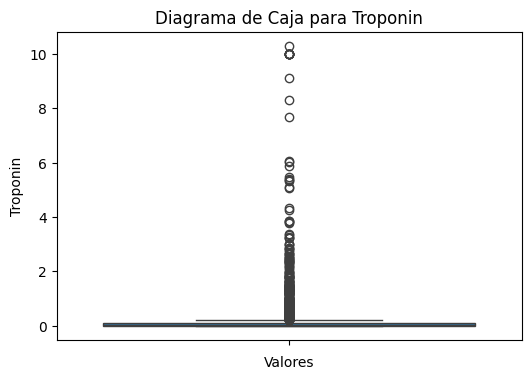

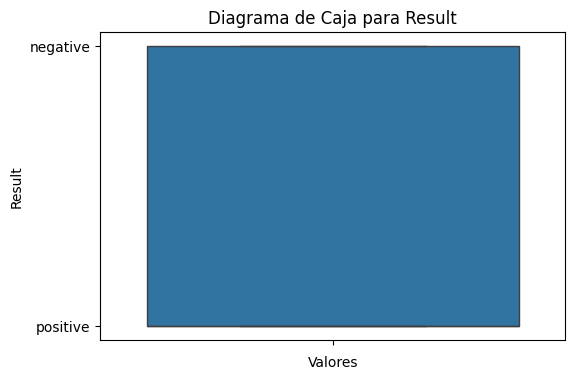

In [8]:
#Revisaremos con diagramas de caja los valoress de cada categoría, con el objetivo de ver si existen valores atipicos
for column in df.columns:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    sns.boxplot(data=df[column])  # Graficar diagrama de caja
    plt.title(f'Diagrama de Caja para {column}')  # Título del gráfico
    plt.xlabel('Valores')  # Etiqueta del eje x
    plt.ylabel(column)  # Etiqueta del eje y
    plt.show()  # Mostrar el gráfico

In [9]:
#Copiamos la base de datos y eliminamos la columna ID ya que no aporta
df_c=df.copy()
df_c.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [10]:
df_c['Result'] = df_c['Result'].replace({'positive': 1, 'negative': 0})
df_c.head()

C:\Users\sebas\AppData\Local\Temp\ipykernel_37556\3453801536.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_c['Result'] = df_c['Result'].replace({'positive': 1, 'negative': 0})


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,0
1,20,1,94,98,46,296.0,6.75,1.060,1
2,56,1,64,160,77,270.0,1.99,0.003,0
3,66,1,70,120,55,270.0,13.87,0.122,1
4,54,1,64,112,65,300.0,1.08,0.003,0


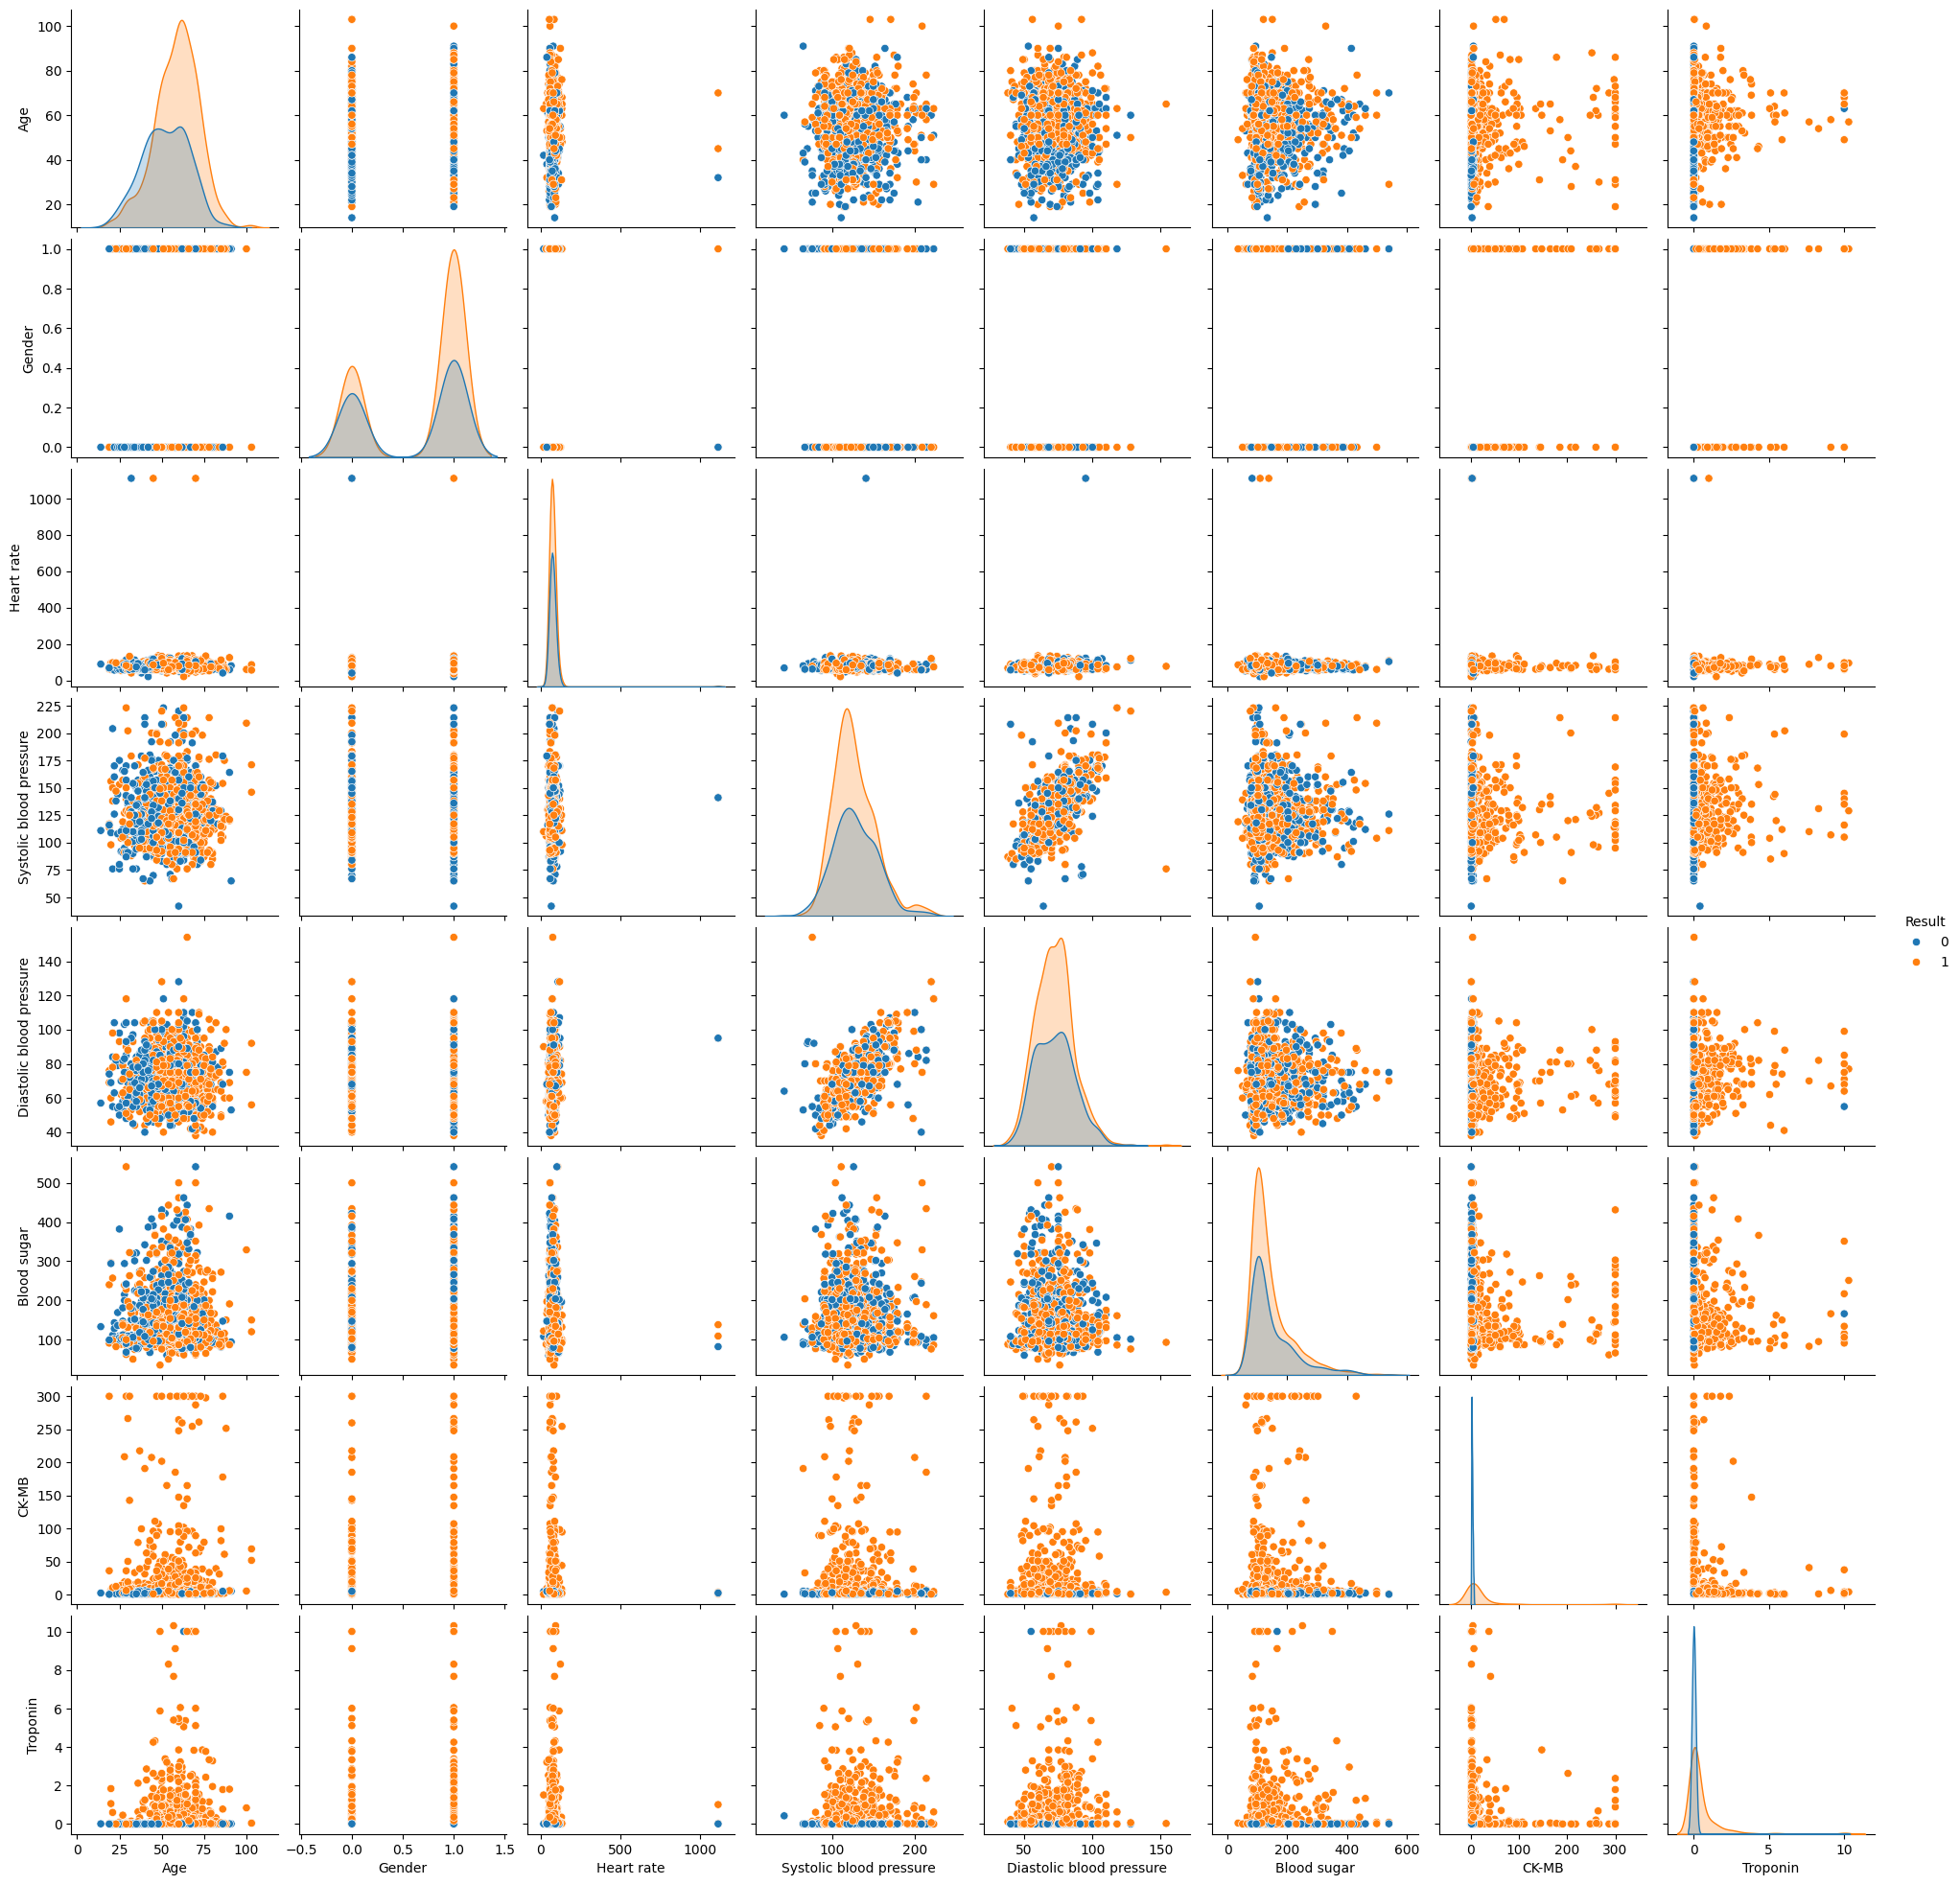

In [11]:
sns.pairplot(df_c, hue='Result');

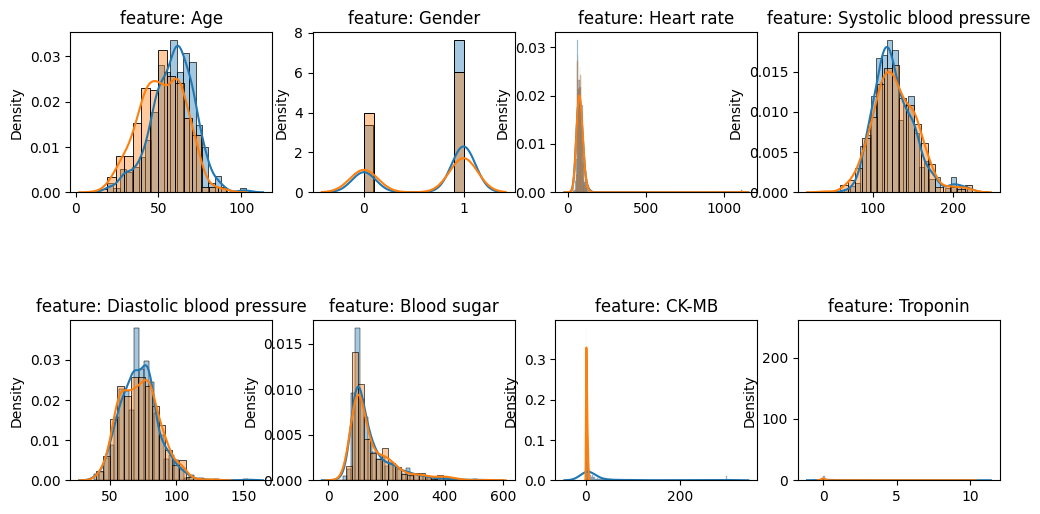

In [13]:
# Representamos gráficamente las características diferenciando entre 0 y 1 la variable dependiente
features = df_c.drop("Result", axis=1)

plt.figure(figsize=(12,32))
gs = gridspec.GridSpec(9, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(df_c[f][df_c["Result"] == 1], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4)
    sns.histplot(df_c[f][df_c["Result"] == 0], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

In [19]:
#Asumiremos el Heart rate >1000 como un error, por lo que lo eliminaremos (es atipico)
df_c=df_c[df_c['Heart rate'] < 1000]

In [25]:
# Calcula el promedio de Heart rate para la variable dependiente 

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result


In [29]:
 Result_1=df_c[df_c['Result'] == 1]['Heart rate'].mean()
 Result_0=df_c[df_c['Result'] == 0]['Heart rate'].mean()
print("resultado 1:",Result_1)
print("resultado 0:",Result_0)

resultado 1: 76.06435643564356
resultado 0: 75.85236220472441


In [30]:
 Result_1=df_c[df_c['Result'] == 1]['CK-MB'].mean()
 Result_0=df_c[df_c['Result'] == 0]['CK-MB'].mean()
print("resultado 1:",Result_1)
print("resultado 0:",Result_0)

resultado 1: 23.317993811881188
resultado 0: 2.5551377952755905


In [31]:
 Result_1=df_c[df_c['Result'] == 1]['Blood sugar'].mean()
 Result_0=df_c[df_c['Result'] == 0]['Blood sugar'].mean()
print("resultado 1:",Result_1)
print("resultado 0:",Result_0)

resultado 1: 144.7240099009901
resultado 0: 149.89114173228347


In [32]:
 Result_1=df_c[df_c['Result'] == 1]['Diastolic blood pressure'].mean()
 Result_0=df_c[df_c['Result'] == 0]['Diastolic blood pressure'].mean()
print("resultado 1:",Result_1)
print("resultado 0:",Result_0)

resultado 1: 72.10519801980197
resultado 0: 72.39566929133858


<h3>Arbol de decision</h3>

In [33]:
train_set_tree, test_set_tree = train_test_split(df_c, test_size=0.2, random_state=42, stratify=df_c["Result"])

In [34]:
#separacion de variables X e Y
#entrenamiento
X_train_tree = train_set_tree.drop("Result", axis=1)
y_train_tree = train_set_tree["Result"].copy()
#test
X_test_tree = test_set_tree.drop("Result", axis=1)
y_test_tree = test_set_tree["Result"].copy()

In [48]:
#aplocamos SMOTE para balancear la variable dependiente en la base de train
smote = SMOTE(random_state=42)
X_resampled_tree, y_resampled_tree = smote.fit_resample(X_train_tree, y_train_tree)

<h3>Random forest</h3>

In [36]:
train_set_rf, test_set_rf = train_test_split(df_c, test_size=0.2, random_state=42, stratify=df_c["Result"])

In [38]:
#separacion de variables X e Y
#entrenamiento
X_train_rf = train_set_rf.drop("Result", axis=1)
y_train_rf = train_set_rf["Result"].copy()
#test
X_test_rf = test_set_rf.drop("Result", axis=1)
y_test_rf = test_set_rf["Result"].copy()

In [54]:
#aplocamos SMOTE para balancear la variable dependiente en la base de train
smote = SMOTE(random_state=42)
X_resampled_rf, y_resampled_rf = smote.fit_resample(X_train_rf, y_train_rf)

<h2>Modelos de decision</h2>

<h3>Arbol de decision</h3>

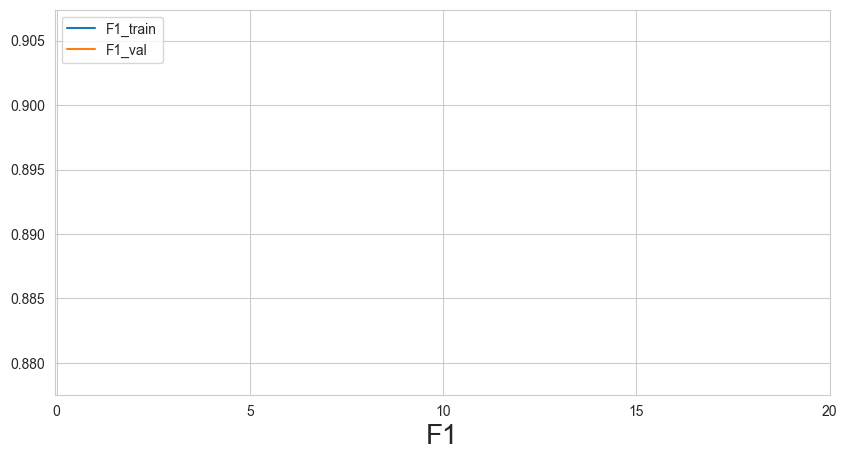

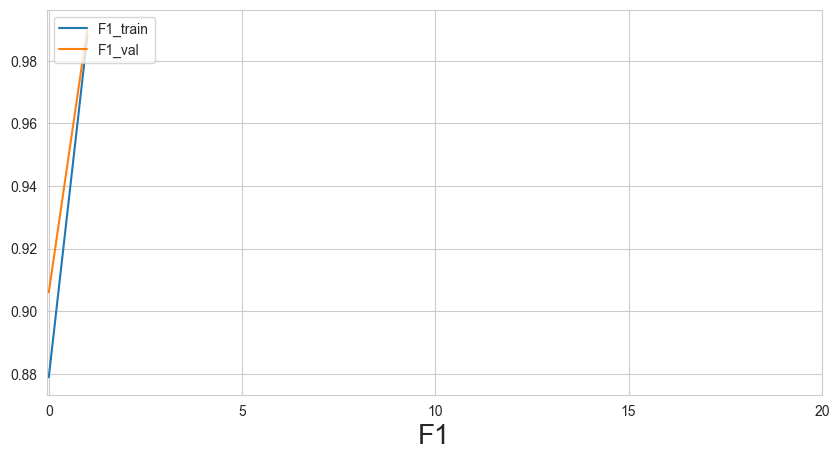

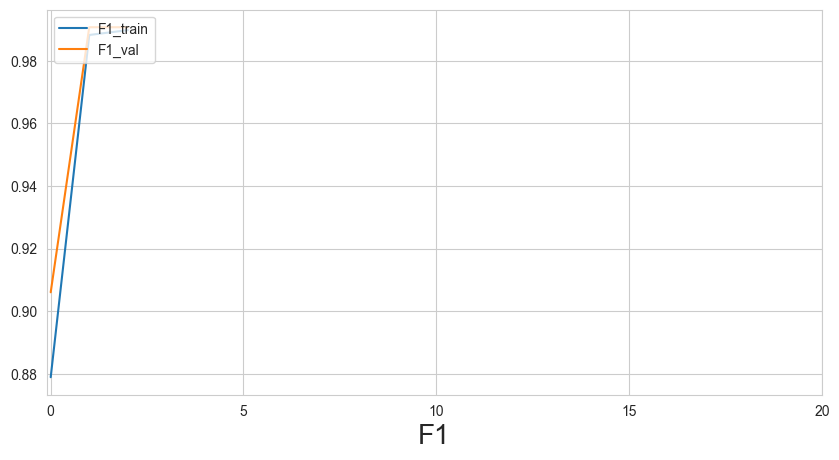

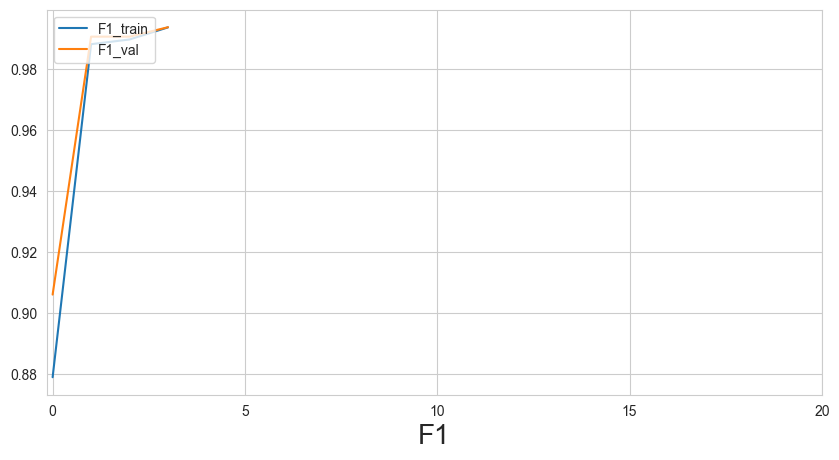

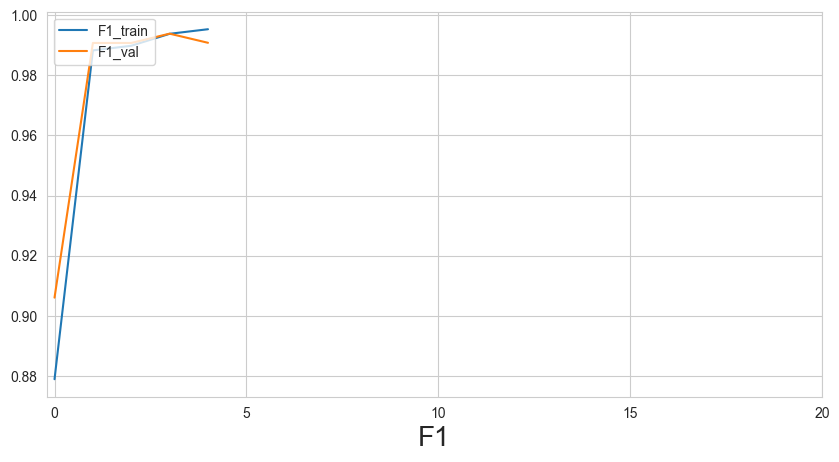

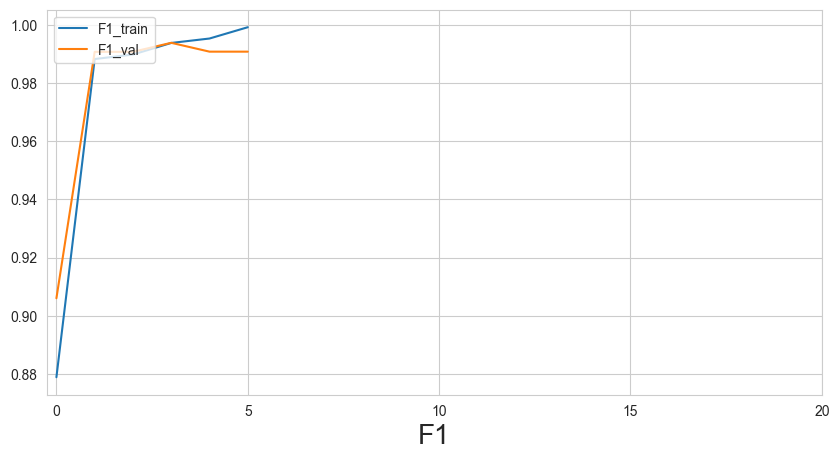

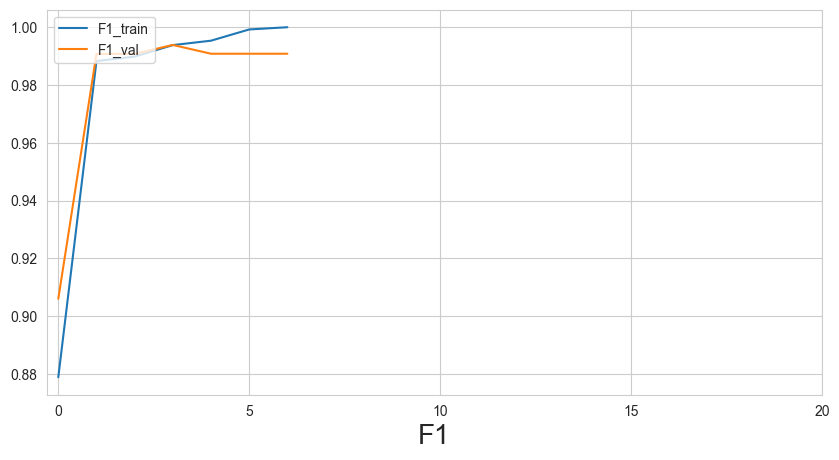

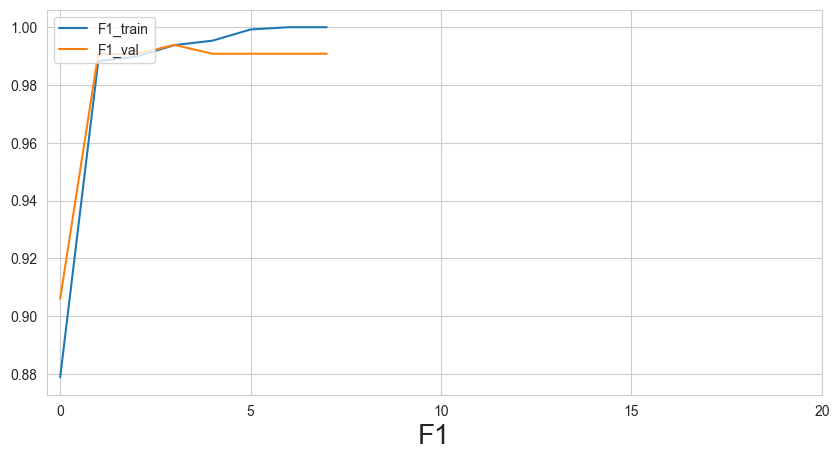

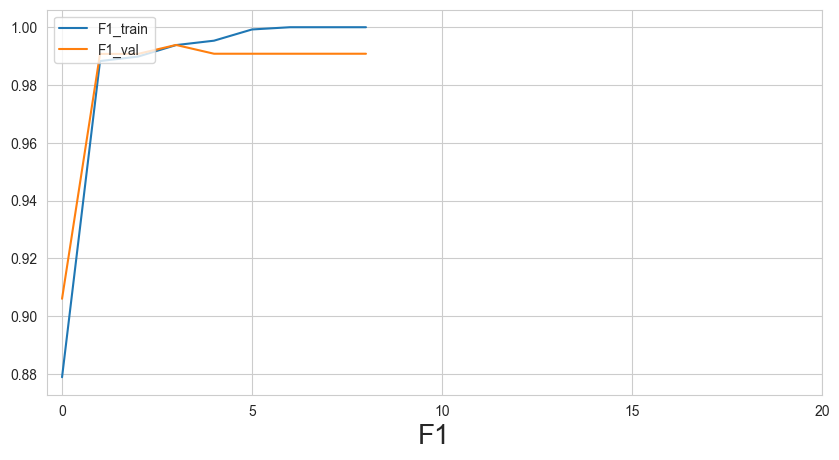

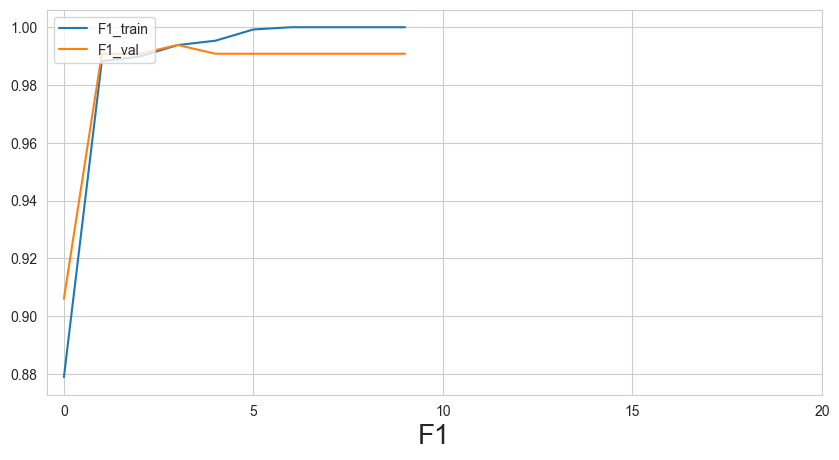

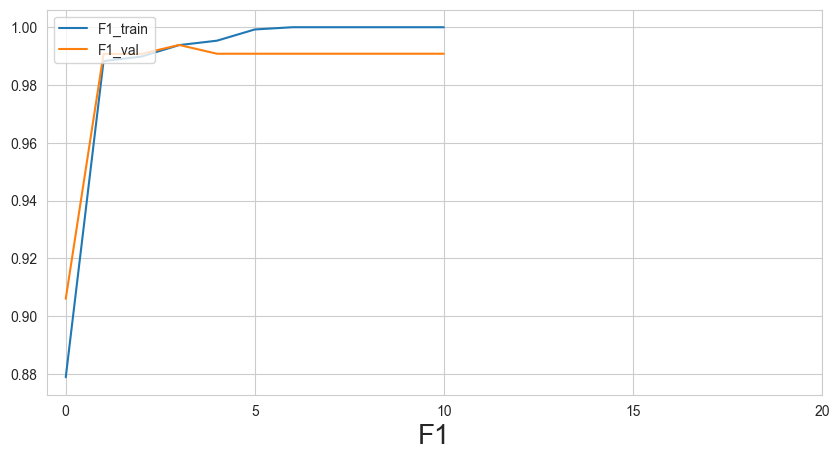

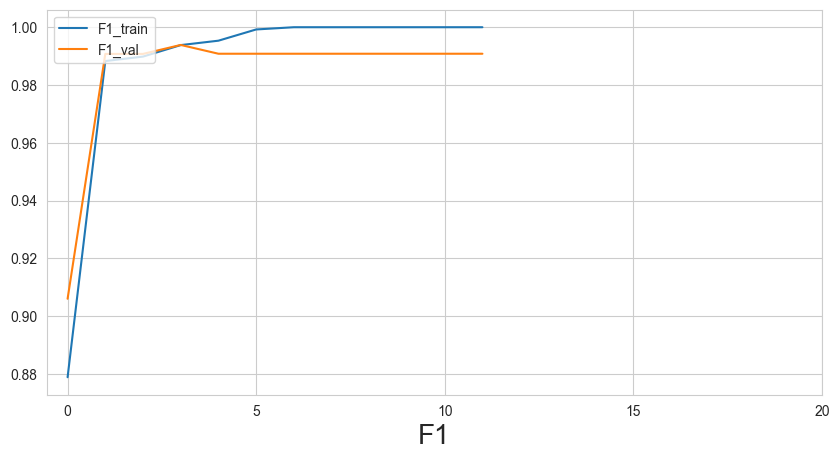

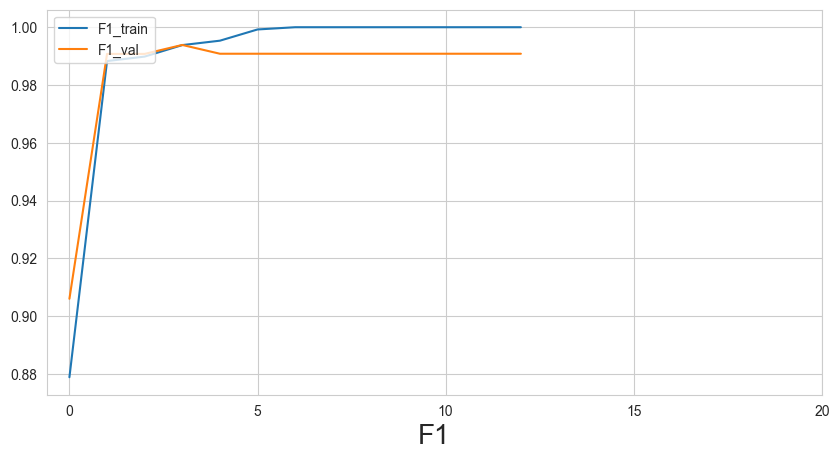

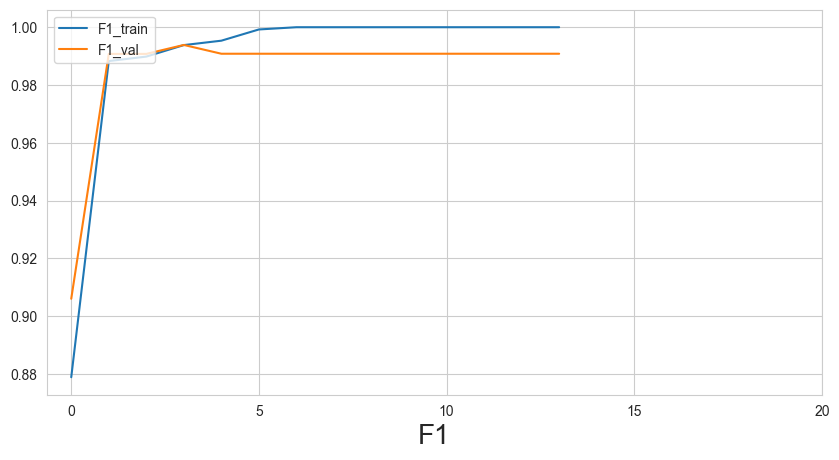

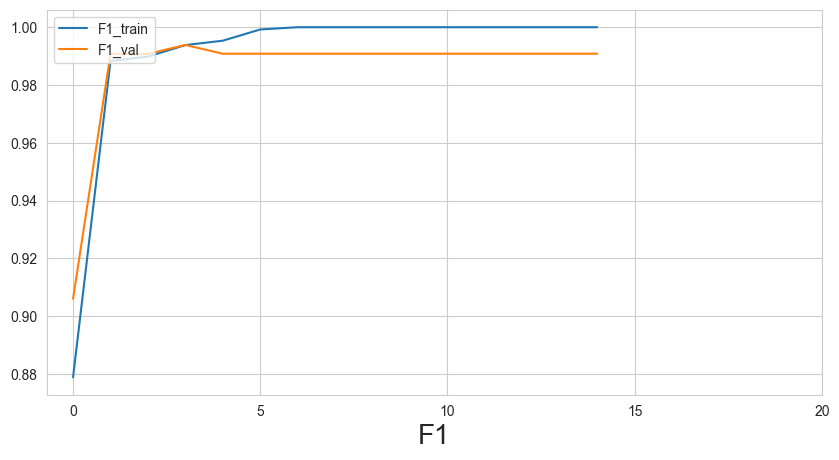

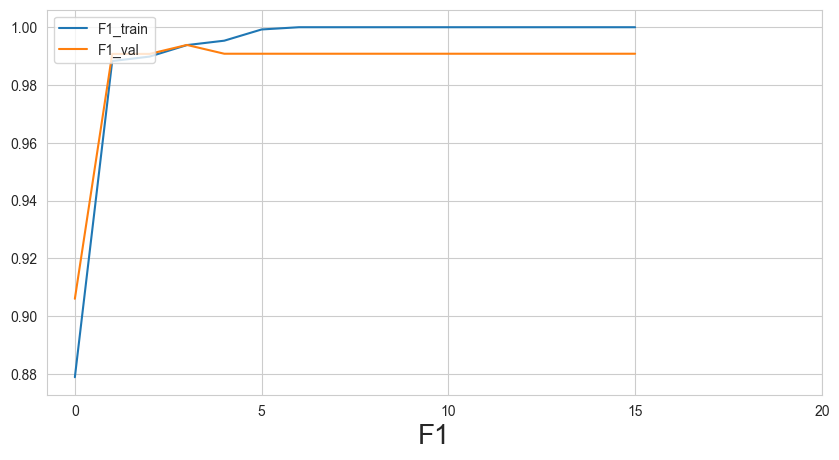

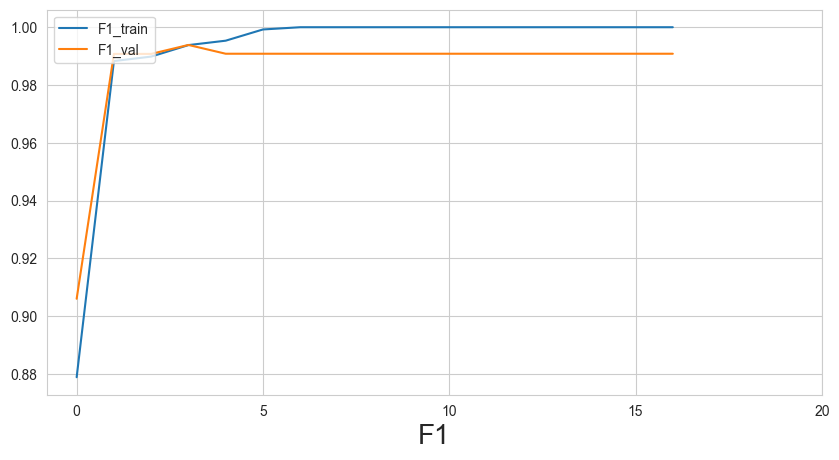

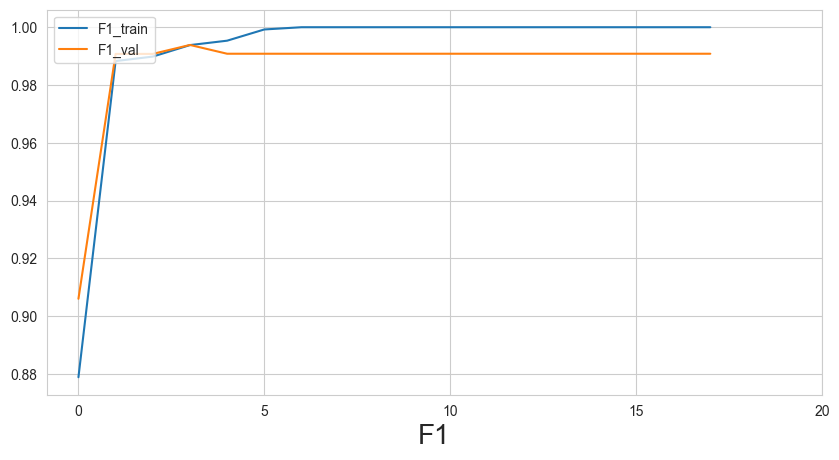

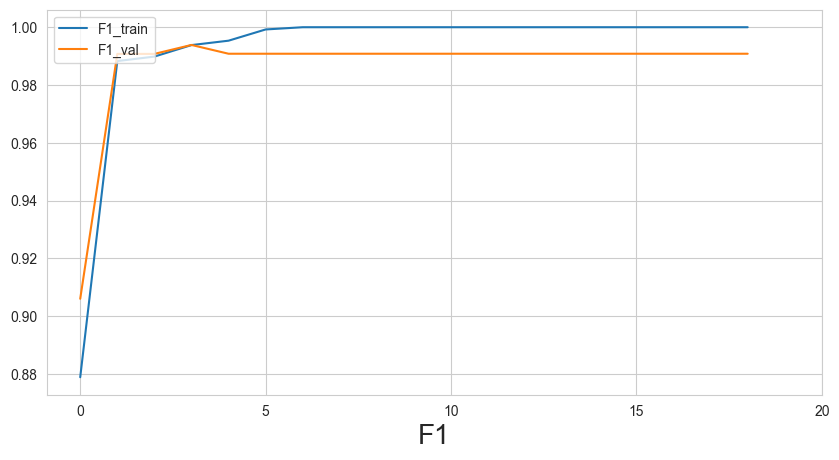

In [49]:
#intento con todas las variables

F1_train_hist_tree=[]
F1_val_hist_tree=[]

for depth in range(1,20):

    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_resampled_tree, y_resampled_tree)
    
    y_train_pred_tree = tree.predict(X_resampled_tree)
    y_val_pred_tree = tree.predict(X_test_tree)
    
    F1_train_tree = f1_score(y_resampled_tree, y_train_pred_tree)
    F1_val_tree = f1_score(y_test_tree, y_val_pred_tree)
    
    F1_train_hist_tree.append(F1_train_tree)
    F1_val_hist_tree.append(F1_val_tree)
    
    plt.figure(figsize=(10,5))
    sns.set_style("whitegrid")
    plt.plot(F1_train_hist_tree, label ="F1_train")
    plt.plot(F1_val_hist_tree, label ="F1_val")
    plt.legend(loc="upper left")
    plt.xticks(range(0,21,5))
    plt.xlabel("max_depth",size=20)
    plt.xlabel("F1",size=20)
    plt.show()

In [50]:
#usamos 3 de profundidad para tener una buena estimación pero poco overffiting
tree_df = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_df.fit(X_resampled_tree, y_resampled_tree)

DecisionTreeClassifier(max_depth=4, random_state=42)

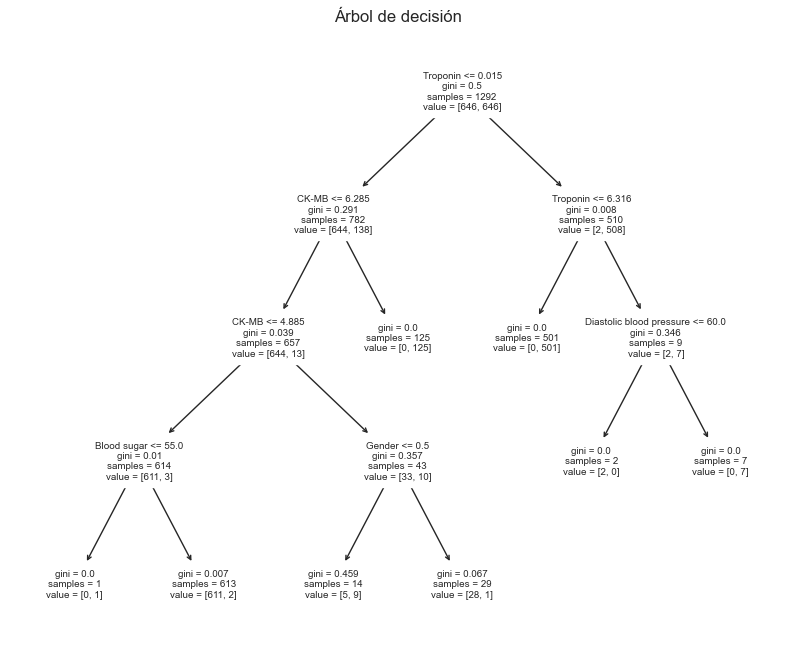

In [51]:
plt.figure(figsize=(10, 8))
plot_tree(tree_df,feature_names=X_resampled_tree.columns, fontsize=7)
plt.title(f"Árbol de decisión")
plt.show()

In [52]:
y_train_pred_tree_df = tree_df.predict(X_resampled_tree)
y_val_pred_tree_df = tree_df.predict(X_test_tree)
    
print('F1_train_tree', f1_score(y_resampled_tree, y_train_pred_tree_df))
print('F1_val_tree', f1_score(y_test_tree, y_val_pred_tree_df))

F1_train_tree 0.9938176197836166
F1_val_tree 0.9938650306748467


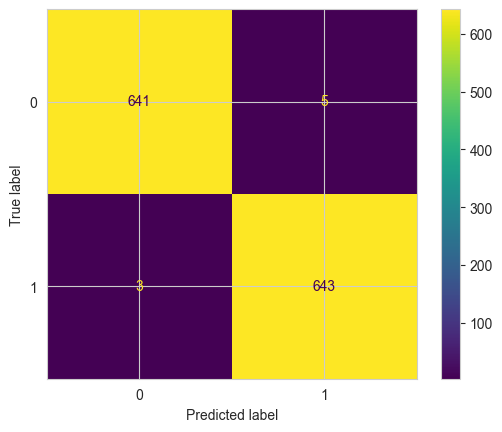

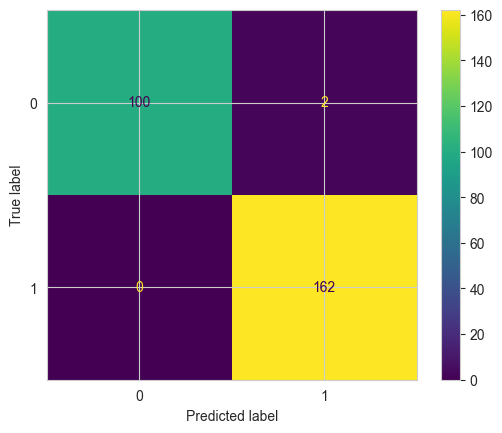

In [53]:
cm_train_tree=confusion_matrix(y_resampled_tree,y_train_pred_tree_df)
cm_val_tree=confusion_matrix(y_test_tree,y_val_pred_tree_df)
cm_plot_train_tree=ConfusionMatrixDisplay(cm_train_tree)
cm_plot_val_tree=ConfusionMatrixDisplay(cm_val_tree)
cm_plot_train_tree.plot()
cm_plot_val_tree.plot()
plt.show()

In [55]:
probs_dt = tree_df.predict_proba(X_test_tree)[:, 1]

<h3>Random forest</h3>

In [60]:
param_distribs = {
       
        'max_depth': randint(low=3, high=6),
    }

rnd_clf = RandomForestClassifier(n_jobs=-1)

rnd_search = RandomizedSearchCV(rnd_clf, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='f1_weighted')

rnd_search.fit(X_resampled_rf, y_resampled_rf)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D14B5C9010>},
                   scoring='f1_weighted')

In [61]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("F1 score:", mean_score, "-", "Parámetros:", params)

F1 score: 0.9876163118417148 - Parámetros: {'max_depth': 4}
F1 score: 0.9868410831052156 - Parámetros: {'max_depth': 5}
F1 score: 0.9876163118417148 - Parámetros: {'max_depth': 3}
F1 score: 0.9868410831052156 - Parámetros: {'max_depth': 5}
F1 score: 0.9868410831052156 - Parámetros: {'max_depth': 5}


In [62]:
rnd_search.best_params_

{'max_depth': 4}

In [63]:
rnd_search.best_estimator_

RandomForestClassifier(max_depth=4, n_jobs=-1)

In [64]:
# Seleccionamos el mejor modelo
clf_rnd = rnd_search.best_estimator_

In [65]:
# Predecimos con el conjunto de datos de entrenamiento
y_train_pred_rf = clf_rnd.predict(X_resampled_rf)
# Predecimos con el conjunto de datos de entrenamiento
y_val_pred_rf = clf_rnd.predict(X_test_rf)

In [66]:
# Predicción con el conjunto de datos de entrenamiento
print("F1 score Train Set:", f1_score(y_train_pred_rf, y_resampled_rf, average='weighted'))
# Predicción con el conjunto de datos de validación
print("F1 score Validation Set:", f1_score(y_val_pred_rf, y_test_rf, average='weighted'))

F1 score Train Set: 0.9883906562701356
F1 score Validation Set: 0.9886468703710083


In [67]:
feature_importances = {name: score for name, score in zip(list(df), clf_rnd.feature_importances_)}

In [68]:
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(5)

Troponin       0.554034
CK-MB          0.307951
Age            0.060691
Gender         0.025412
Blood sugar    0.015686
dtype: float64

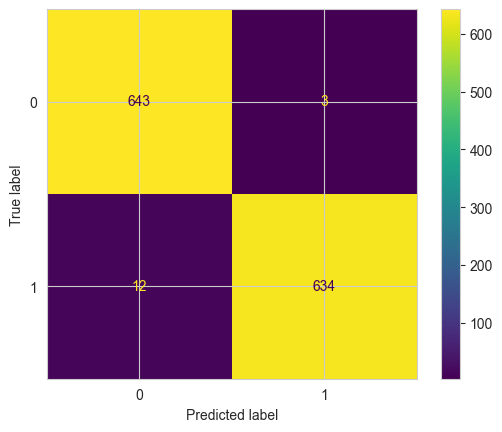

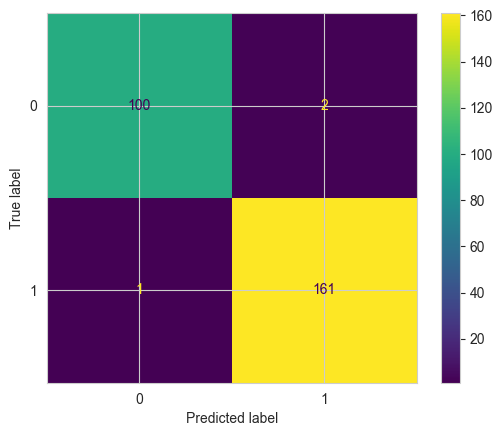

In [69]:
cm_train_rf=confusion_matrix(y_resampled_rf,y_train_pred_rf)
cm_val_rf=confusion_matrix(y_test_rf,y_val_pred_rf)
cm_plot_train_rf=ConfusionMatrixDisplay(cm_train_rf)
cm_plot_val_rf=ConfusionMatrixDisplay(cm_val_rf)
cm_plot_train_rf.plot()
cm_plot_val_rf.plot()
plt.show()

In [70]:
probs_rf = clf_rnd.predict_proba(X_test_rf)[:, 1]

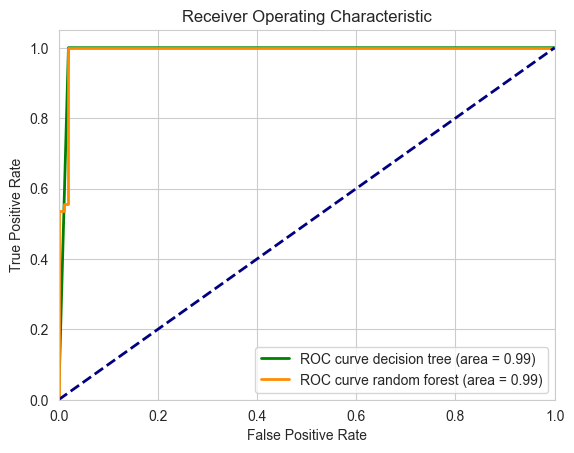

In [83]:
from sklearn.metrics import roc_curve, auc
# Calcular la curva ROC
fpr_rf, tpr_rf,thresholds_rf = roc_curve(y_test_rf,probs_rf)
fpr_dt, tpr_dt,threshold_dt = roc_curve(y_test_tree,probs_dt)

roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='ROC curve decision tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve random forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [85]:
# Encontrar el umbral correspondiente al punto en la curva ROC donde FPR es 0
optimal_threshold_index = np.argmax(tpr_rf - fpr_rf)
optimal_threshold = thresholds_rf[optimal_threshold_index]

# Clasificar las muestras utilizando el umbral seleccionado
predicted_labels = (probs_rf >= optimal_threshold).astype(int)

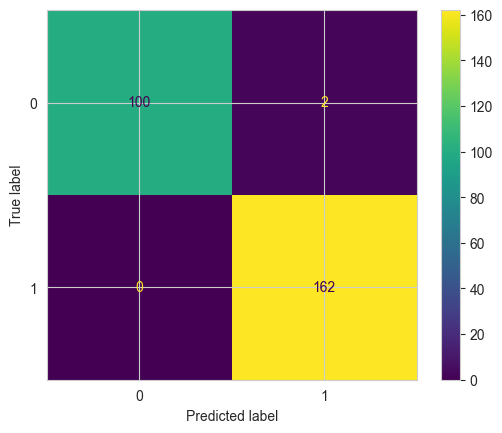

In [87]:
# Calcular la matriz de confusión utilizando el umbral ajustado
conf_matrix = confusion_matrix(y_test_rf, predicted_labels)
cm_plot=ConfusionMatrixDisplay(conf_matrix)
cm_plot.plot()
plt.show()

In [88]:
optimal_threshold

0.38592045552397464